# housing price prediction using XGBRegressor

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [28]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
print(f"shape of the dataFrame{df.shape}")
print("\n")
print(f"Checking the any null value {df.isnull().sum()}")
print("\n")
print(f"statistics of the data{df.describe()}")

shape of the dataFrame(20640, 10)


Checking the any null value longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


statistics of the data          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   


**Here we have noticed that in some houses total bedrooms are missing valves so we will fill 0 bedrooms to this data**

In [10]:
df['total_bedrooms'].fillna(0)

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [30]:
df =  df.drop('ocean_proximity',axis=1 )

<Axes: >

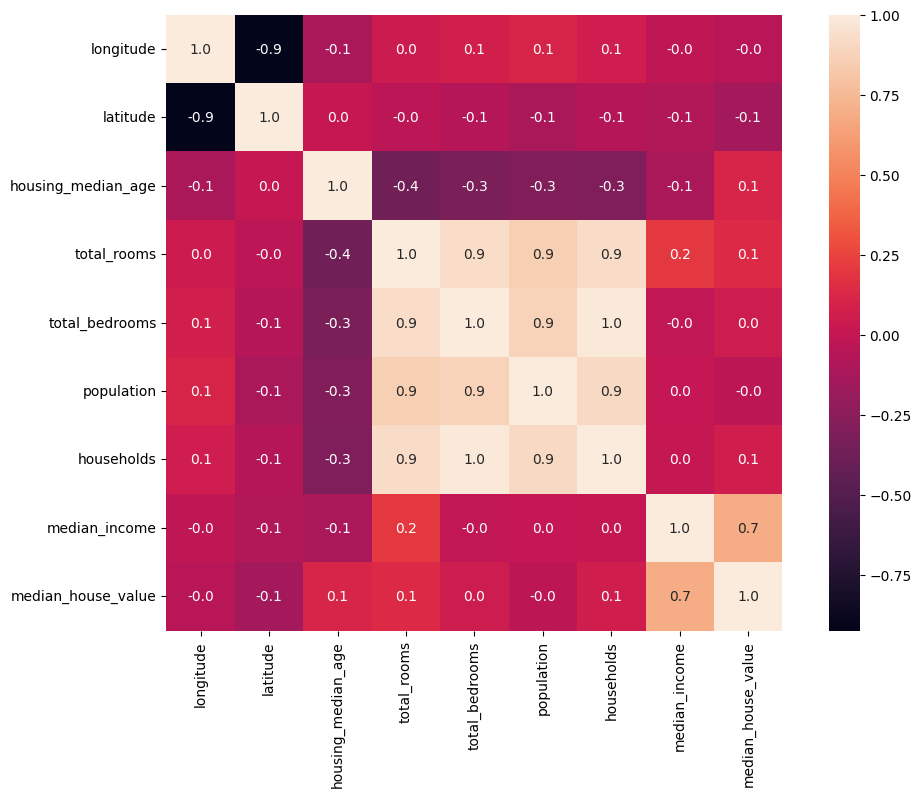

In [31]:
correlation = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation,cbar= True,square=True,fmt=".1f",annot=True)


In [32]:
x = df.drop("median_house_value",axis = 1)
y = df["median_house_value"]
print(f'values of x{x.head()}\n')
print(f'values of y{y.head()}')

values of x   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  
0       322.0       126.0         8.3252  
1      2401.0      1138.0         8.3014  
2       496.0       177.0         7.2574  
3       558.0       219.0         5.6431  
4       565.0       259.0         3.8462  

values of y0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


In [ ]:
%pip install xgboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn import metrics

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=1)

In [40]:
print(f'{x_train.shape,x_train.head()}\n\n')
print(f'{y_train.shape,y_train.head()}')

((17544, 8),        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17210    -119.71     34.43                18.0       1170.0           372.0   
19599    -120.93     37.56                17.0       1812.0           361.0   
4664     -118.30     34.05                46.0       1386.0           457.0   
9692     -121.65     36.69                21.0       7884.0          2011.0   
10766    -117.90     33.63                26.0       1632.0           376.0   

       population  households  median_income  
17210       681.0       346.0         2.1974  
19599       672.0       334.0         1.5500  
4664       1845.0       485.0         2.1414  
9692       4907.0      1919.0         2.7367  
10766       598.0       375.0         3.2125  )


((17544,), 17210    255000.0
19599    166100.0
4664     157700.0
9692     160300.0
10766    455000.0
Name: median_house_value, dtype: float64)


In [41]:
xgb_r = XGBRegressor(objective = 'reg:linear',seed =123,n_estimators = 10)

In [42]:
xgb_r.fit(x_train,y_train)

C:\Users\LHCP\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [10:47:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [43]:
pred = xgb_r.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score

In [47]:
# x_train_accuracy = xgb_r.predict(x_train)
train_data_accuracy = accuracy_score(pred,y_test)
print(x_train_accuracy)


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets